(schematic)=
# `schematic` - manual drawing

This example demonstrates the basic functionality of the `schematic` module.
The schematic module is a simple wrapper around `matplotlib` that allows
programatically drawing diagrams, e.g. for tensor networks, in 2D and also
pseudo-3D. It is used as the backend for automatic drawing in
[TensorNetwork.draw](quimb.tensor.drawing.draw_tn), but it also useful for
making manual diagrams not associated with a tensor network. The main object
is the [`Drawing`](quimb.schematic.Drawing) class.


## Illustrative full examples

The following examples are intended to be illustrative of a full drawing.
If you supply a dict of `presets` to `Drawing`, then you can provide default
styling for various elements simply by name.

### 2D example

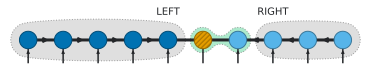

In [1]:
%config InlineBackend.figure_formats = ['svg']
from quimb import schematic

presets = {
    'bond': {'linewidth': 3},
    'phys': {'linewidth': 1.5},
    'center': {
        # `get_color` uses more colorblind friendly colors
        'color': schematic.get_color('orange'),
        'hatch': '/////',
    },
    'left': {
        'color': schematic.get_color('bluedark'),
    },
    'right': {
        'color': schematic.get_color('blue'),
    },
}

d = schematic.Drawing(presets=presets)

L = 10
center = 5

for i in range(10):
    # draw tensor
    d.circle((i, 0), preset=(
        "center" if i == center else
        "left" if i < center else
        "right"
    ))

    # draw physical index
    d.line((i, 0), (i, -2/3), preset='phys')

    # draw virtual bond
    if i + 1 < L:
        d.line((i, 0), (i + 1, 0), preset='bond')

    # draw isometric conditions
    if i != center:
        d.arrowhead((i, -2/3), (i, 0), preset='phys')
    if i < center - 1:
        d.arrowhead((i, 0), (i + 1, 0), preset='bond')
    if i > center + 1:
        d.arrowhead((i, 0), (i - 1, 0), preset='bond')

# label the left
if center > 0:
    d.text((center - 1, 0.8), 'LEFT')
    d.patch_around([(i, 0) for i in range(center)], radius=0.5)

# label pair
if center + 1 < L:
    d.patch_around_circles(
        (center, 0), 0.3,
        (center + 1, 0), 0.3,
        facecolor=(.2, .8, .5, .4),
    )

# label the right
if center + 2 < L:
    d.text((center + 2, 0.8), 'RIGHT')
    d.patch_around([(i, 0) for i in range(center + 2, L)], radius=0.5)

### Pseudo-3D example

If you supply 3D coordinates to `Drawing` methods then the objects will be
mapped by the axonometric projection to 2D and given appropriate z-ordering.
The projection and orientation can be controlled in the `Drawing` constructor.

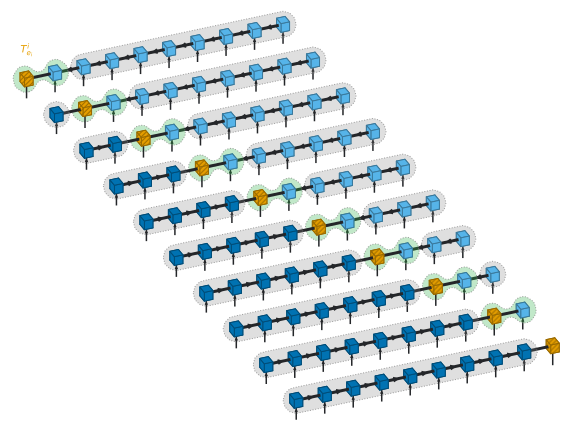

In [2]:
d = schematic.Drawing(presets=presets, figsize=(10, 10))

L = 10

radius = 0.15

for center in range(L):
    # map the stage into a 3D x-coordinate
    x = 2 * center

    for i in range(10):
        # draw tensor, can now use cube rather than circle
        d.cube((x, i, 0), radius=radius, preset=(
            "center" if i == center else
            "left" if i < center else
            "right"
        ))

        # draw physical index
        d.line((x, i, 0), (x, i, -2/3), preset='phys')

        # draw virtual bond
        if i + 1 < L:
            d.line((x, i + radius, 0), (x, i + 1 - radius, 0), preset='bond')

        # draw isometric conditions
        if i != center:
            d.arrowhead((x, i, -2/3), (x, i, 0), preset='phys')
        if i < center - 1:
            d.arrowhead((x, i, 0), (x, i + 1, 0), preset='bond')
        if i > center + 1:
            d.arrowhead((x, i, 0), (x, i - 1, 0), preset='bond')

    # label the left
    if center > 0:
        d.patch_around([(x, i, 0) for i in range(center)], radius=3 * radius, smoothing=0.0)

    # label pair
    if center + 1 < L:
        d.patch_around_circles(
            (x, center, 0), 2.5 * radius,
            (x, center + 1, 0), 2.5 * radius,
            facecolor=(.2, .7, .3, .3),
        )

    # label the right
    if center + 2 < L:
        d.patch_around([(x, i, 0) for i in range(center + 2, L)], radius=3 * radius, smoothing=0.0)

d.text((0, 0, 1), '$T^i_{e_i}$', color=schematic.get_color('orange'))

## Individual elements:

Here we demonstrate the different types of individual element that can be placed.
The `hash_to_color` function is useful way to deterministically generate colors
from hashable objects.

In [3]:
import numpy as np

### Circles

[Drawing.circle](quimb.schematic.Drawing.circle) draws a circle with a given
radius and center coordinates.

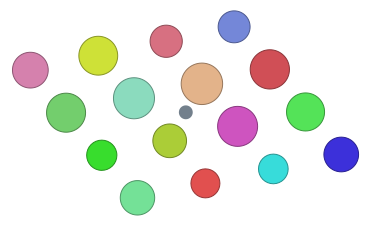

In [4]:
d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.circle(
        coo,
        radius=np.random.uniform(0.2, 0.3),
        color=schematic.hash_to_color(str(coo))
    )

# dot is a simple alias circle
d.dot((1.5, 1.5, 0))

### Cubes

[Drawing.cube](quimb.schematic.Drawing.cube) draws a cube with a given
'radius' and center coordinates, only for 3D coordinates.

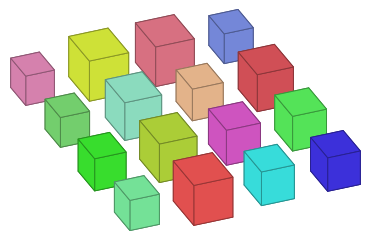

In [5]:
d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.cube(
        coo,
        radius=np.random.uniform(0.2, 0.3),
        color=schematic.hash_to_color(str(coo))
    )

### Text

[Drawing.text](quimb.schematic.Drawing.cube) places text in data coordinates
(including 3D). [Drawing.label_ax](quimb.schematic.Drawing.label_ax) and
[Drawing.label_fig](quimb.schematic.Drawing.label_fig) are the same but default
to axis and figure coordinates respectively.

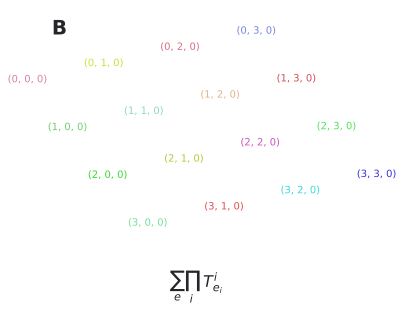

In [6]:
d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.text(
        coo, str(coo),
        color=schematic.hash_to_color(str(coo))
    )

# labels are the same but use the axes or figure coordinates
d.label_ax(0.1, 0.9, '$\\mathbf{B}$', fontsize=20)
d.label_fig(0.5, 0.0, '$\\sum_e \\prod_i ~ T^i_{e_i}$', fontsize=16)

### General shapes

[Drawing.shape](quimb.schematic.Drawing.shape) draws a general filled shape
given a sequence of 2D or 3D coordinates.

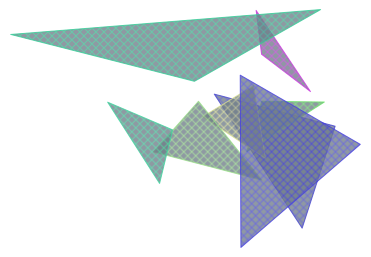

In [7]:
d = schematic.Drawing()

rng = np.random.default_rng(1)
pts = rng.normal(size=(8, 3, 3))

for coos in pts:
    d.shape(
        coos,
        alpha=0.8,
        hatch="XXX",
        edgecolor=schematic.hash_to_color(str(coos)),
    )

### Markers

[Drawing.marker](quimb.schematic.Drawing.marker) is a convenience method for
specifying the shape of a patch using a single string or integer, to yield
a regular polygon.

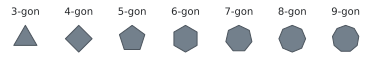

In [8]:
d = schematic.Drawing()

for p in range(3, 10):
    d.marker((p, 0), marker=p)
    d.text((p, 0.5), f"{p}-gon")

It is a wrapper around [Drawing.regular_polygon](quimb.schematic.Drawing.regular_polygon) with which you can also change the rotation with the `orientation` argument.

## Lines and curves

### Lines

The basic method for drawing lines between a pair of 2D or 3d points is
[Drawing.line](quimb.schematic.Drawing.line).

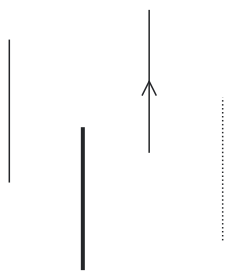

In [9]:
d = schematic.Drawing()

d.line((0, 0, 0), (0, 0, 1))
d.line((0, 1, 0), (0, 1, 1), arrowhead=True)
d.line((1, 0, 0), (1, 0, 1), linewidth=4)
d.line((1, 1, 0), (1, 1, 1), linestyle=':')

When drawing lattice bonds it can be used fule to shorten the lines somewhat for visual effect.

1. The `stretch` kwarg applies an overall relative stretch to the whole line.
2. The `shorten` kwarg makes the line stop an absolute amount shorter, a tuple can be used to control start and end separately.

By setting `shorten` to the `radius` of circles drawn, the lines connect exactly to the circle edge:

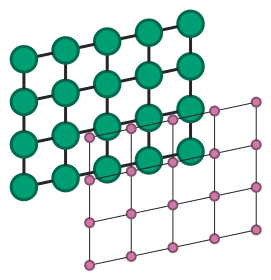

In [10]:
d = schematic.Drawing()

r = 0.15

edges = [
    ((i, j), (i, j + 1)) for i in range(5) for j in range(3)
] + [
    ((i, j), (i + 1, j)) for i in range(4) for j in range(4)
]
sites = {site for edge in edges for site in edge}

for site in sites:
    d.circle((0, *site), radius=2.0 * r, color=schematic.get_color("green"), linewidth=3)
    d.circle((3, *site), radius=0.7 * r, color=schematic.get_color("pink"), linewidth=2)
for sitea, siteb in edges:
    d.line((0, *sitea), (0, *siteb,), shorten=2.0 * r, linewidth=3)
    d.line((3, *sitea), (3, *siteb,), shorten=0.7 * r, linewidth=1)

### Arrows and labels

You can easily add text and arrows along lines:

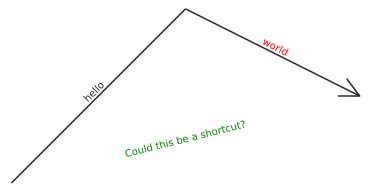

In [11]:
d = schematic.Drawing()

pa, pb, pc = (0, 0), (1, 1), (2, 0.5)

d.line(pa, pb, text="hello\n")
d.line(pb, pc, text=dict(text="world\n", color='red'), arrowhead=dict(center=1))

# calling `line` with `text=` is a shortcut for `text_between`
d.text_between(pa, pc, "Could this be a shortcut?", color="green")

### Curves

If you want a line to pass through multiple points, you can use
[Drawing.curve](quimb.schematic.Drawing.curve) to draw a smooth curve.

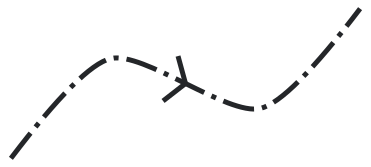

In [12]:
d = schematic.Drawing()

d.curve(
    [(0, 0), (1, 1), (2.5, 0.5), (3.5, 1.5)],
    linestyle='-.', linewidth=5,
)

# you can draw just the arrowhead separatel
d.arrowhead((1, 1), (2.5, 0.5), linewidth=5, width=0.15)

Curves pass *exactly* through all points given, with the `smoothing` kwarg controlling... how smoothly they do this.

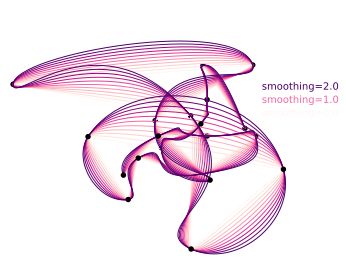

In [13]:
import matplotlib as mpl

d = schematic.Drawing()

rng = np.random.default_rng(1)
pts = rng.normal(size=(20, 3))
cm = mpl.colormaps.get_cmap('RdPu')

for pt in pts:
    d.dot(pt, color='black', radius=0.05)

for smoothing in np.linspace(0.0, 2.0, 11):
    d.curve(pts, smoothing=smoothing, color=cm(smoothing / 2))

d.label_ax(1.0, 0.60, "smoothing=0.0", color=cm(0.0))
d.label_ax(1.0, 0.65, "smoothing=1.0", color=cm(0.5))
d.label_ax(1.0, 0.70, "smoothing=2.0", color=cm(1.0))

[Drawing.curve](quimb.schematic.Drawing.curve) also takes the `shorten` kwarg which shortens the final segments by the specified absolute amount:

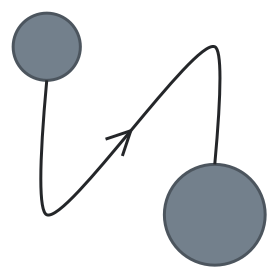

In [19]:
d = schematic.Drawing()

r1 = 0.2
r2 = 0.3

d.circle((0, 1), radius=r1, linewidth=3)
d.curve([(0, 1), (0, 0), (1, 1), (1, 0)], shorten=(r1, r2), linewidth=3)
# also add an arrow on the middle segment
d.arrowhead((0, 0), (1, 1), linewidth=3)
d.circle((1, 0), radius=r2, linewidth=3)

### Multi-edges

If you want to programmatically draw multiple lines from one place to the other ('multi-edges') you can use `line_offset`:

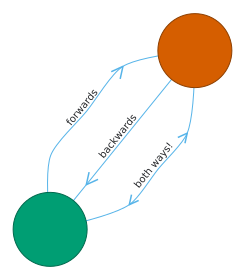

In [13]:
d = schematic.Drawing()

pa, pb = (0, 0, 0), (0, 1, 1)

green = schematic.get_color("green")
red = schematic.get_color("red")
blue = schematic.get_color("blue")

d.circle(pa, color=green)
d.circle(pb, color=red)

# you can still use arrowheads and text labels
d.line_offset(pa, pb, 0.2, arrowhead=dict(center=0.9), text='forwards\n', color=blue)
d.line_offset(pa, pb, 0.0, arrowhead=dict(center=0.9, reverse=True), text='backwards\n', color=blue)
d.line_offset(pa, pb, -0.2, arrowhead=dict(center=0.9, reverse="both"), text='both ways!\n', color=blue, midlength=0.4)

## Highlighting areas and groups of objects

### Patches around general areas

In technical drawings it is often useful to highlight areas. The
[Drawing.patch](quimb.schematic.Drawing.patch) method does this by filling in
a curve, given by a sequence of 2D or 3D coordinates.

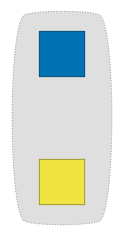

In [14]:
d = schematic.Drawing(figsize=(4, 4))

d.marker((0, 0), marker='s', color=schematic.get_color('yellow'))
d.marker((0, 1), marker='s', color=schematic.get_color('bluedark'))
d.patch([
    (-.3, -.3),
    (+.3, -.3),
    (+.3, +1.3),
    (-.3, +1.3),
], smoothing=0.3)

### Patches around two circles

If you want to specifically highlight two circles, you can use
[Drawing.patch_around_circles](quimb.schematic.Drawing.patch_around_circles),
and simply specify the two circles by their center coordinates and radii.

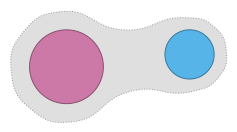

In [15]:
d = schematic.Drawing(figsize=(4, 4))

d.circle((0, 0), radius=3, color=schematic.get_color('pink'))
d.circle((10, 1), radius=2, color=schematic.get_color('blue'))

d.patch_around_circles(
    (0, 0), 3,
    (10, 1), 2,
    padding=0.5,
)

### Patches around arbitrary collections of objects

If you want to highlight an arbitrary collection of objects, you can call
[Drawing.patch_around](quimb.schematic.Drawing.patch_around), this computes
the convex hull of the objects and draws a patch around it.

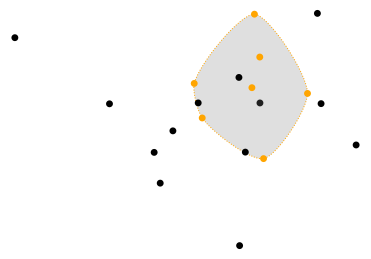

In [16]:
d = schematic.Drawing()

for pt in pts[:7]:
    d.dot(pt, color='orange', radius=0.05)
for pt in pts[7:]:
    d.dot(pt, color='black', radius=0.05)

d.patch_around(pts[:7], edgecolor='orange')

You can control how much padding is added around the perimeter of the objects
using the `radius` kwarg.

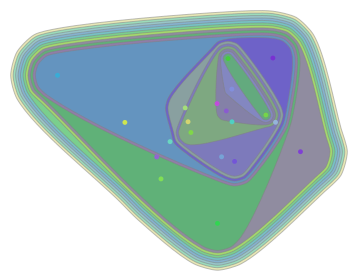

In [17]:
d = schematic.Drawing()

for k, pt in enumerate(pts):
    d.dot(pt, color=schematic.hash_to_color(str(k)), radius=0.05)

for k in range(1, len(pts)):
    d.patch_around(
        pts[:k],
        radius=0.05 * k,
        facecolor=schematic.hash_to_color(str(k - 1)),
        linestyle="-",
        zorder=-k,
        alpha=0.5,
    )